In [140]:
import pandas as pd
import numpy as np


In [2]:
train=pd.read_csv('train.csv')
train.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [3]:
train.drop(columns=['User_ID','Browser_Used','Device_Used'],axis=1,inplace=True)
train.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


In [4]:
train['Description'].str.len()

0         248
1        1077
2        1327
3         502
4        1613
         ... 
38927     769
38928     533
38929    1065
38930     519
38931     115
Name: Description, Length: 38932, dtype: int64

In [5]:
train.Is_Response.value_counts()

happy        26521
not happy    12411
Name: Is_Response, dtype: int64

In [6]:
print("Ratio of happy: ",round(len(train[train['Is_Response']=='happy'])/len(train['Is_Response']),2)*100,'%')
print("Ratio of Not happy: ",round(len(train[train['Is_Response']=='not happy'])/len(train['Is_Response']),2)*100,'%')

Ratio of happy:  68.0 %
Ratio of Not happy:  32.0 %


In [7]:
train['Is_Response'].replace({'happy':1,'not happy':0},inplace=True)

In [8]:
train.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,0
1,I stayed at the Crown Plaza April -- - April -...,0
2,I booked this hotel through Hotwire at the low...,0
3,Stayed here with husband and sons on the way t...,1
4,My girlfriends and I stayed here to celebrate ...,0


In [9]:
train['Description']=train.Description.str.lower()

In [10]:
train['Length']=train.Description.str.len()

In [11]:
train.head()

,Description,Is_Response,Length
0,the room was kind of clean but had a very stro...,0,248
1,i stayed at the crown plaza april -- - april -...,0,1077
2,i booked this hotel through hotwire at the low...,0,1327
3,stayed here with husband and sons on the way t...,1,502
4,my girlfriends and i stayed here to celebrate ...,0,1613


In [12]:
train['Description'] = train['Description'].str.replace(r'[^\w\d\s]', ' ')

train['Description'] = train['Description'].str.replace(r'\s+', ' ')

train['Description'] = train['Description'].str.replace(r'^\s+|\s+?$', '')

In [13]:
train['Description'] = train['Description'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

train['Description'] = train['Description'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

train['Description'] =train['Description'].str.replace(r'£|\$', 'dollers')

train['Description'] =train['Description'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

train['Description'] =train['Description'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [14]:
train.shape

(38932, 3)

In [15]:
import string
from nltk.corpus import stopwords

In [16]:
stop_words=stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
train['Description']=train['Description'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [18]:
train['new_len'] = train['Description'].str.len()
train.head()

,Description,Is_Response,Length,new_len
0,room kind clean strong smell dogs generally av...,0,248,140
1,stayed crown plaza april april staff friendly ...,0,1077,649
2,booked hotel hotwire lowest price could find g...,0,1327,783
3,stayed husband sons way alaska cruise loved ho...,1,502,333
4,girlfriends stayed celebrate th birthdays plan...,0,1613,965


In [19]:
print(train['Description'][2])

booked hotel hotwire lowest price could find got front desk manager gave us smoking room argued little baby would booked room known smoking manager would hear anything told hotwire books cheapest rooms available get go unhappy great deal persuasion discussion got nonsmoking room thereafter room minimal amenities besides great location near dupont circle much say overpriced hotel room small ok condition bathroom small tub bathroom amenities also minimal fridge microwave rent fridge staff keep baby things parking costs per day best drive also breakfast included lobby small feels old thing available coffee lobby decent poor service minimal amenities small rooms small bathrooms view great location distance metro either mcpherson station dupont station try look better available


In [ ]:
import seaborn as sns
sns.pairplot(train)

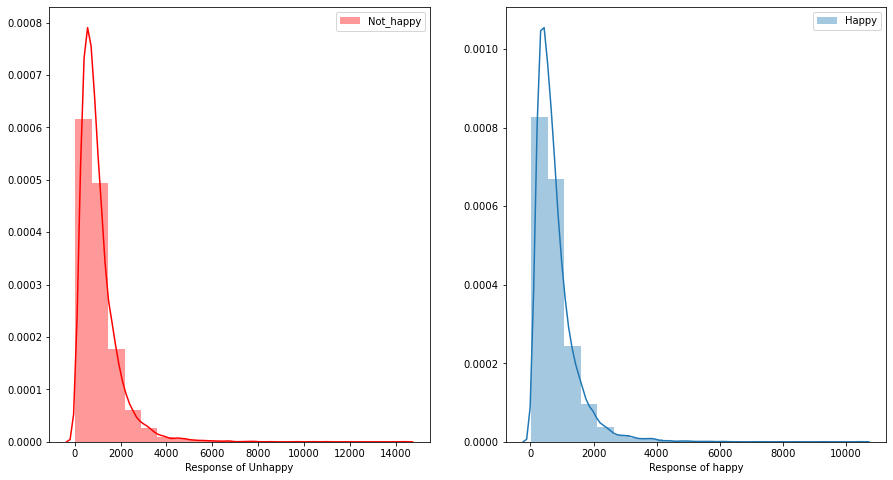

In [94]:
import matplotlib.pyplot as plt


h,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(train[train['Is_Response']==0]['Length'],bins=20,ax=ax[0],label='Not_happy',color='r')
ax[0].set_xlabel('Response of Unhappy')
ax[0].legend()

sns.distplot(train[train['Is_Response']==1]['Length'],bins=20,ax=ax[1],label='Happy')
ax[1].set_xlabel('Response of happy')
ax[1].legend()
plt.show()

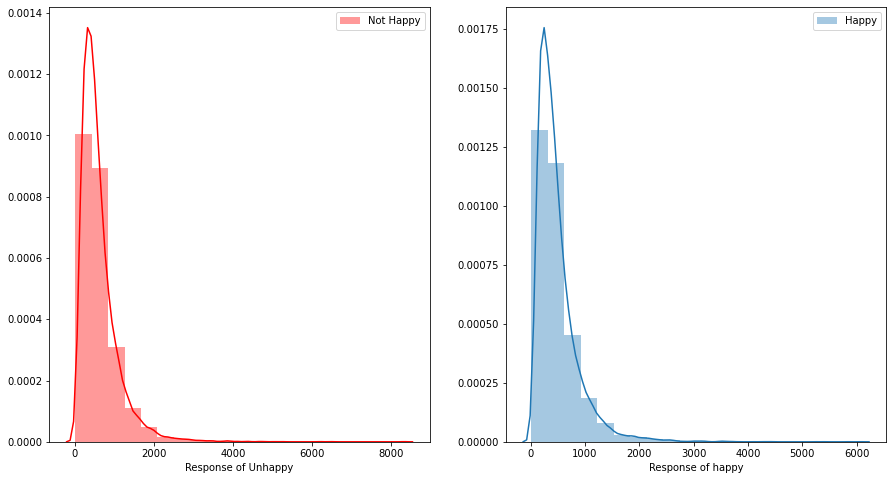

In [95]:
f,ax=plt.subplots(1,2,figsize=(15,8))

sns.distplot(train[train['Is_Response']==0]['new_len'],color='r',bins=20,label='Not Happy',ax=ax[0])
ax[0].set_xlabel('Response of Unhappy')
ax[0].legend()

sns.distplot(train[train['Is_Response']==1]['new_len'],bins=20,label='Happy',ax=ax[1])
ax[1].set_xlabel('Response of happy')
ax[1].legend()

plt.show()

In [ ]:
#!pip install wordcloud

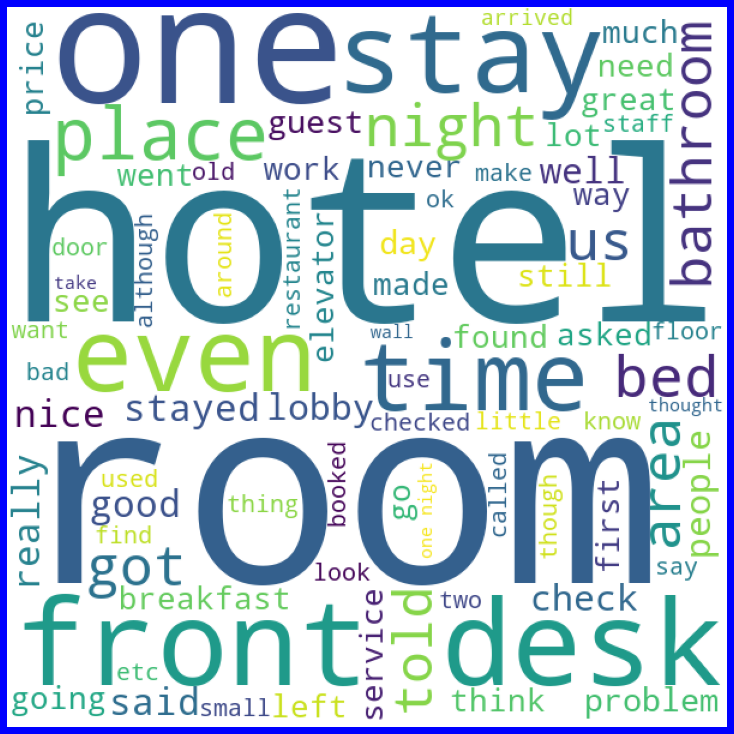

In [23]:
from wordcloud import WordCloud

unhappy=train['Description'][train['Is_Response']==0]
un_cloud=WordCloud(width=600,height=600,background_color='white',max_words=80).generate(' '.join(unhappy))
plt.figure(figsize=(10,10),facecolor='b')
plt.imshow(un_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

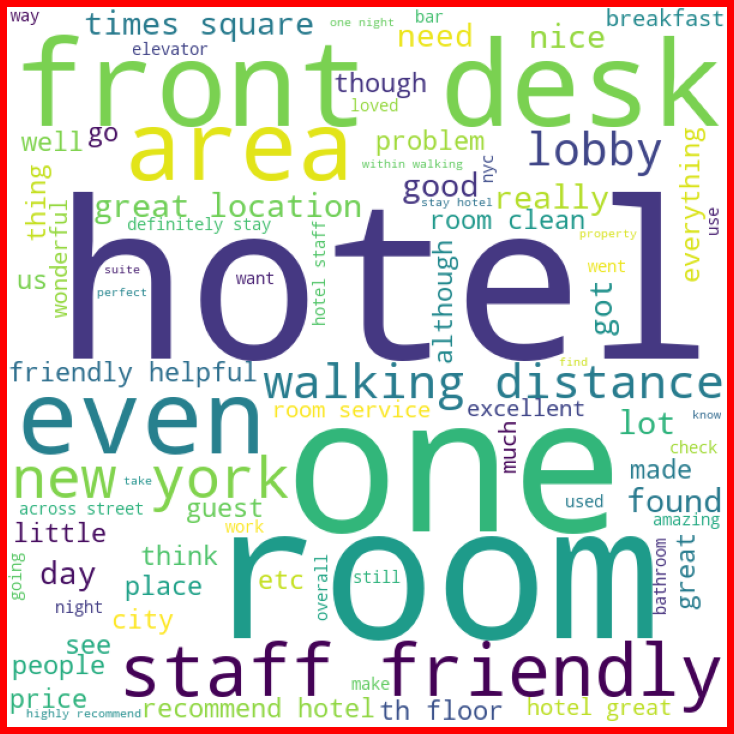

In [24]:
happy=train['Description'][train['Is_Response']==1]
h_cloud=WordCloud(width=600,height=600,background_color='white',max_words=80).generate(' '.join(happy))
plt.figure(figsize=(10,10),facecolor='r')
plt.imshow(h_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [96]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

Accuracy of the model: 0.8121853488133155
Classification report :               precision    recall  f1-score   support

           0       0.95      0.43      0.60      3113
           1       0.79      0.99      0.88      6620

    accuracy                           0.81      9733
   macro avg       0.87      0.71      0.74      9733
weighted avg       0.84      0.81      0.79      9733

Confussion matrix: [[1351 1762]
 [  66 6554]]


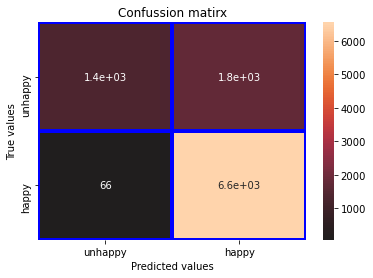

In [163]:
tfvd=TfidfVectorizer()
multi=MultinomialNB()

X=train['Description']

feature=tfvd.fit_transform(X)
x=feature
y=train['Is_Response']

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45)
multi.fit(x_train,y_train)
ypred=multi.predict(x_test)
print('Accuracy of the model:',accuracy_score(y_test,ypred))
print('Classification report :', classification_report(y_test,ypred))
print('Confussion matrix:',confusion_matrix(y_test,ypred))

conf=confusion_matrix(y_test,ypred)

ax=plt.subplot()
sns.heatmap(conf,ax=ax,annot=True,linecolor='b',linewidths=3,center=0)
ax.set_xlabel('Predicted values')
ax.set_ylabel('True values')
ax.set_title('Confussion matirx')

ax.xaxis.set_ticklabels(['unhappy','happy'])
ax.yaxis.set_ticklabels(['unhappy','happy'])
plt.show()

Accuracy of the model: 0.8821534984074797
Classification report :               precision    recall  f1-score   support

           0       0.86      0.75      0.80      3096
           1       0.89      0.94      0.92      6637

    accuracy                           0.88      9733
   macro avg       0.88      0.85      0.86      9733
weighted avg       0.88      0.88      0.88      9733

Confussion matrix: [[2330  766]
 [ 381 6256]]


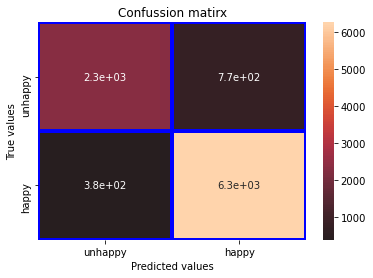

In [118]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
lr.fit(x_train,y_train)
ypred=lr.predict(x_test)
print('Accuracy of the model:',accuracy_score(y_test,ypred))
print('Classification report :', classification_report(y_test,ypred))
print('Confussion matrix:',confusion_matrix(y_test,ypred))

conf=confusion_matrix(y_test,ypred)

ax=plt.subplot()
sns.heatmap(conf,ax=ax,annot=True,linecolor='b',linewidths=3,center=0)
ax.set_xlabel('Predicted values')
ax.set_ylabel('True values')
ax.set_title('Confussion matirx')

ax.xaxis.set_ticklabels(['unhappy','happy'])
ax.yaxis.set_ticklabels(['unhappy','happy'])
plt.show()

Accuracy of the model: 0.7439638343778896
Classification report :               precision    recall  f1-score   support

           0       0.60      0.59      0.59      3096
           1       0.81      0.82      0.81      6637

    accuracy                           0.74      9733
   macro avg       0.70      0.70      0.70      9733
weighted avg       0.74      0.74      0.74      9733

Confussion matrix: [[1825 1271]
 [1221 5416]]


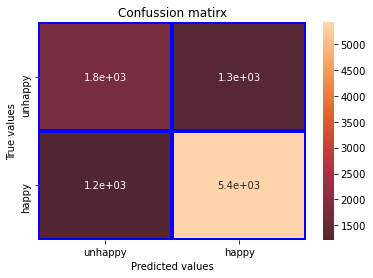

In [99]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
dtc.fit(x_train,y_train)
ypred=dtc.predict(x_test)
print('Accuracy of the model:',accuracy_score(y_test,ypred))
print('Classification report :', classification_report(y_test,ypred))
print('Confussion matrix:',confusion_matrix(y_test,ypred))

conf=confusion_matrix(y_test,ypred)

ax=plt.subplot()
sns.heatmap(conf,ax=ax,annot=True,linecolor='b',linewidths=3,center=0)
ax.set_xlabel('Predicted values')
ax.set_ylabel('True values')
ax.set_title('Confussion matirx')

ax.xaxis.set_ticklabels(['unhappy','happy'])
ax.yaxis.set_ticklabels(['unhappy','happy'])
plt.show()


Accuracy of the model: 0.7833144970718176
Classification report :               precision    recall  f1-score   support

           0       0.77      0.45      0.57      3096
           1       0.79      0.94      0.86      6637

    accuracy                           0.78      9733
   macro avg       0.78      0.69      0.71      9733
weighted avg       0.78      0.78      0.76      9733

Confussion matrix: [[1398 1698]
 [ 411 6226]]


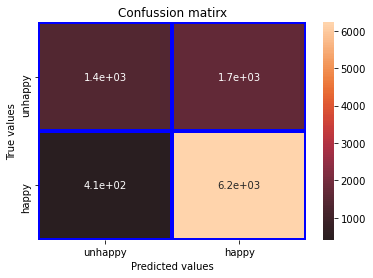

In [100]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
kn.fit(x_train,y_train)
ypred=kn.predict(x_test)
print('Accuracy of the model:',accuracy_score(y_test,ypred))
print('Classification report :', classification_report(y_test,ypred))
print('Confussion matrix:',confusion_matrix(y_test,ypred))

conf=confusion_matrix(y_test,ypred)

ax=plt.subplot()
sns.heatmap(conf,ax=ax,annot=True,linecolor='b',linewidths=3,center=0)
ax.set_xlabel('Predicted values')
ax.set_ylabel('True values')
ax.set_title('Confussion matirx')

ax.xaxis.set_ticklabels(['unhappy','happy'])
ax.yaxis.set_ticklabels(['unhappy','happy'])
plt.show()


In [169]:
import joblib
joblib.dump(lr,'NLP_Project1')

['NLP_Project1']

In [141]:
test_f=pd.read_csv('test.csv')
test_f.head()

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


In [142]:
test_f.head()

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


In [143]:
test_f.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
dtype: int64

In [144]:
test_f.drop(columns=['User_ID','Browser_Used','Device_Used'],axis=1,inplace=True)

In [170]:
tfvd=TfidfVectorizer()

features=tfvd.fit_transform(test_f['Description'])


y_pred=lr.predict(features)

joblib.dump(lr,'NLP_Project1')
test_f['Is_Response']=y_pred
test_f.to_csv('NLP_Project1')


ValueError: X has 40111 features per sample; expecting 45873

In [167]:
print(test_f['Description'].shape)

print(features.shape)


(29404,)
(29404, 40111)


In [164]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(29199, 45873)
(29199,)
(9733, 45873)
(9733,)


In [55]:
train_new=train.drop(columns=['Length','new_len'])
train_new.head()

,Description,Is_Response
0,room kind clean strong smell dogs generally av...,0
1,stayed crown plaza april april staff friendly ...,0
2,booked hotel hotwire lowest price could find g...,0
3,stayed husband sons way alaska cruise loved ho...,1
4,girlfriends stayed celebrate th birthdays plan...,0


In [73]:
train_new = train_new.groupby('Is_Response').agg({'Description': ', '.join}).reset_index()
train_new

,Is_Response,Description
0,0,room kind clean strong smell dogs generally av...
1,1,stayed husband sons way alaska cruise loved ho...


In [78]:
uhappy=train_new['Description'][0]
happy=train_new['Description'][1]

In [88]:
tokenized_words = uhappy.split()
final_words = [word for word in tokenized_words if word not in stop_words]
final_words

['room',
 'kind',
 'clean',
 'strong',
 'smell',
 'dogs',
 'generally',
 'average',
 'ok',
 'overnight',
 'stay',
 'fussy',
 'would',
 'consider',
 'staying',
 'price',
 'right',
 'breakfast',
 'free',
 'better',
 'nothing,',
 'stayed',
 'crown',
 'plaza',
 'april',
 'april',
 'staff',
 'friendly',
 'attentive',
 'elevators',
 'tiny',
 'food',
 'restaurant',
 'delicious',
 'priced',
 'little',
 'high',
 'side',
 'course',
 'washington',
 'dc',
 'pool',
 'little',
 'children',
 'room',
 'fifth',
 'floor',
 'two',
 'comfortable',
 'beds',
 'plenty',
 'space',
 'one',
 'person',
 'tv',
 'little',
 'small',
 'todays',
 'standards',
 'limited',
 'number',
 'channels',
 'small',
 'bit',
 'mold',
 'bathtub',
 'area',
 'could',
 'removed',
 'little',
 'bleach',
 'appeared',
 'carpets',
 'vacummed',
 'every',
 'day',
 'reported',
 'light',
 'bulb',
 'burned',
 'never',
 'replaced',
 'ice',
 'machines',
 'odd',
 'numbered',
 'floors',
 'one',
 'floor',
 'work',
 'encountered',
 'staff',
 'elevat

In [89]:
from collections import Counter
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)



Counter({' happy': 40, ' sad': 36, ' fearful': 30, ' angry': 22, ' attracted': 21, ' powerless': 17, ' attached': 11, ' hated': 11, ' anxious': 11, ' singled out': 10, ' apathetic': 10, ' adequate': 9, ' loved': 8, ' fearless': 8, ' entitled': 8, ' cheated': 7, ' esteemed': 7, ' surprise': 6, ' alone': 6, ' bored': 5, ' belittled': 5, ' independent': 4, ' derailed': 4, ' free': 4, ' codependent': 4, ' embarrassed': 3, ' average': 3, ' focused': 3, ' demoralized': 3, ' ecstatic': 3, ' lustful': 2, ' safe': 2, ' obsessed': 2, ' lost': 2, ' burdened': 2})


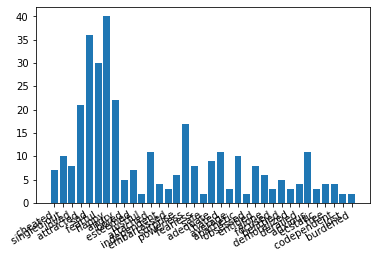

In [90]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

In [91]:
tokenized_words = happy.split()
final_words1 = [word for word in tokenized_words if word not in stop_words]
final_words1

['stayed',
 'husband',
 'sons',
 'way',
 'alaska',
 'cruise',
 'loved',
 'hotel',
 'great',
 'experience',
 'ask',
 'room',
 'north',
 'tower',
 'facing',
 'north',
 'west',
 'best',
 'views',
 'high',
 'floor',
 'stunning',
 'view',
 'needle',
 'city',
 'even',
 'cruise',
 'ships',
 'ordered',
 'room',
 'service',
 'dinner',
 'could',
 'enjoy',
 'perfect',
 'views',
 'room',
 'service',
 'dinners',
 'delicious',
 'perfect',
 'spot',
 'walk',
 'everywhere',
 'enjoy',
 'city',
 'almost',
 'forgot',
 'heavenly',
 'beds',
 'heavenly,',
 'rooms',
 'one',
 'nice',
 'clearly',
 'updated',
 'recently',
 'clean',
 'bed',
 'comfy',
 'needed',
 'updating',
 'carpet',
 'old',
 'wrinkled',
 'example',
 'great',
 'location',
 'visiting',
 'inner',
 'harbor',
 'getting',
 'fells',
 'point',
 'orioles',
 'games',
 'etc',
 'supershuttle',
 'bwi',
 'worked',
 'great',
 'ways',
 'tv',
 'remotes',
 'rooms',
 'terrible',
 'watch',
 'much',
 'tv',
 'big',
 'deal',
 'wireless',
 'sketchy',
 'th',
 'th',
 'f

In [92]:
from collections import Counter
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words1:
            emotion_list.append(emotion)

w1 = Counter(emotion_list)
print(w1)

Counter({' happy': 45, ' sad': 32, ' fearful': 29, ' attracted': 24, ' angry': 17, ' powerless': 14, ' attached': 12, ' hated': 11, ' adequate': 9, ' anxious': 9, ' fearless': 8, ' entitled': 8, ' cheated': 7, ' loved': 7, ' esteemed': 7, ' singled out': 7, ' belittled': 6, ' alone': 6, ' apathetic': 5, ' surprise': 5, ' bored': 4, ' demoralized': 4, ' codependent': 4, ' embarrassed': 3, ' average': 3, ' obsessed': 3, ' focused': 3, ' derailed': 3, ' ecstatic': 3, ' free': 3, ' safe': 2, ' lost': 2, ' lustful': 2, ' independent': 2, ' burdened': 1})


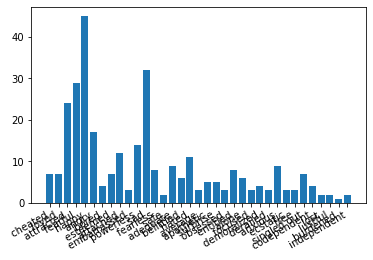

In [93]:
fig, ax1 = plt.subplots()
ax1.bar(w1.keys(), w1.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()